Processing subfolder: Augmented Banana Black Sigatoka Disease
Processing subfolder: Augmented Banana Bract Mosaic Virus Disease
Processing subfolder: Augmented Banana Healthy Leaf
Processing subfolder: Augmented Banana Moko Disease
Processing subfolder: Augmented Banana Panama Disease
Processing subfolder: Augmented Banana Yellow Sigatoka Disease
Found 2254 files belonging to 6 classes.
Class names: ['Augmented Banana Black Sigatoka Disease', 'Augmented Banana Bract Mosaic Virus Disease', 'Augmented Banana Healthy Leaf', 'Augmented Banana Moko Disease', 'Augmented Banana Panama Disease', 'Augmented Banana Yellow Sigatoka Disease']


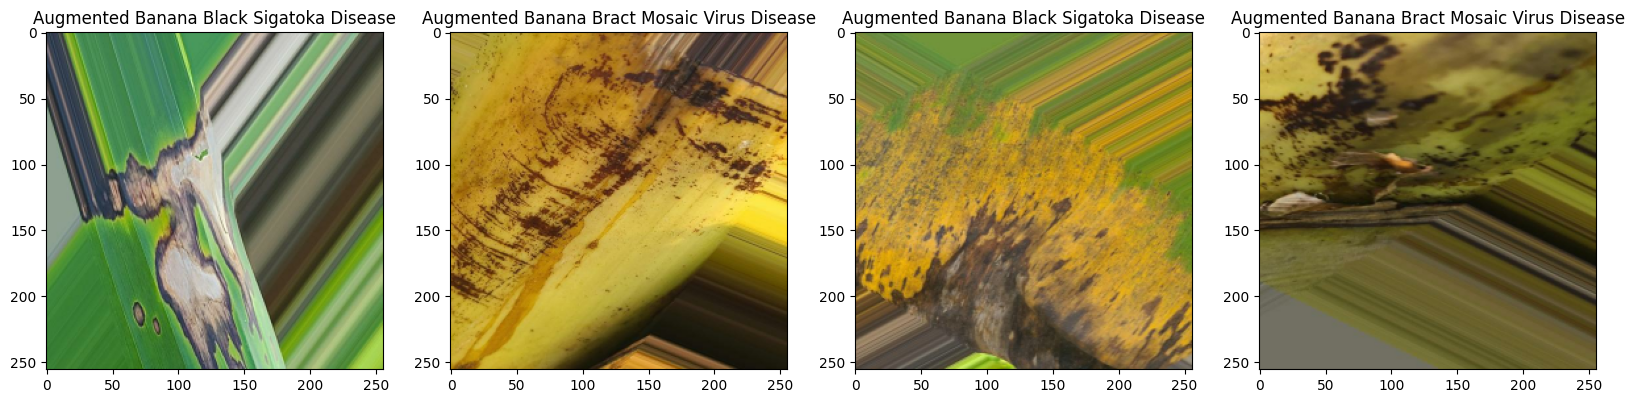

In [27]:
import os
import tensorflow as tf
import cv2
import imghdr
import stat
from matplotlib import pyplot as plt

# Path to the dataset directory
data_dir_outer = 'Banana Disease Recognition Dataset'
target_class = os.path.join(data_dir_outer, 'Augmented images', 'Augmented images')

# Verify if the target directory exists
if not os.path.exists(target_class):
    raise Exception(f"Folder {target_class} does not exist!")

# Validate and clean image files
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

def change_permissions(path):
    os.chmod(path, stat.S_IWRITE)

for subfolder in os.listdir(target_class):
    subfolder_path = os.path.join(target_class, subfolder)
    if os.path.isdir(subfolder_path):
        print(f"Processing subfolder: {subfolder}")
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            # Skip directories
            if os.path.isdir(file_path):
                print(f"Skipping directory: {file_path}")
                continue
            try:
                # Validate image file type
                tip = imghdr.what(file_path)
                if tip not in image_exts:
                    print(f"Invalid file detected: {file_path}, removing...")
                    change_permissions(file_path)
                    os.remove(file_path)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                change_permissions(file_path)
                os.remove(file_path)


# Load dataset from the cleaned directory
data = tf.keras.utils.image_dataset_from_directory(
    target_class,
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32
)

# Preview dataset information
print("Class names:", data.class_names)

# Display a batch of images
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

# Visualize images
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(data.class_names[batch[1][idx]])
plt.show()


In [28]:
from tensorflow.keras import layers, models

# Split the dataset into training, validation, and test sets
train_size = 0.7
val_size = 0.2
test_size = 0.1

train_data = data.take(int(len(data) * train_size))
val_data = data.skip(int(len(data) * train_size)).take(int(len(data) * val_size))
test_data = data.skip(int(len(data) * (train_size + val_size)))

# Normalize pixel values (scale to [0, 1])
def scale_data(images, labels):
    images = tf.cast(images, tf.float32) / 255.0  # Scale pixel values
    return images, labels

train_data = train_data.map(scale_data)
val_data = val_data.map(scale_data)
test_data = test_data.map(scale_data)


In [29]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data.class_names), activation='softmax')  # Output layer
])

model.summary()  # Print model architecture


c:\Users\fab\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,750 (56.61 MB)

 Trainable params: 14,839,750 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [31]:


history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.4057 - loss: 1.7490 - val_accuracy: 0.6696 - val_loss: 0.7774
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.7102 - loss: 0.7680 - val_accuracy: 0.7188 - val_loss: 0.7545
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7492 - loss: 0.6089 - val_accuracy: 0.7567 - val_loss: 0.5996
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7979 - loss: 0.5533 - val_accuracy: 0.7545 - val_loss: 0.6350
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8888 - loss: 0.3260 - val_accuracy: 0.8504 - val_loss: 0.4435
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.8888 - loss: 0.3127 - val_accuracy: 0.8326 - val_loss: 0.5383
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9341 - loss: 0.2077 - val_accuracy: 0.9107 - val_loss: 0.3244
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9681 - loss: 0.1200 - val_accuracy: 0.8482 - val_loss:

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step


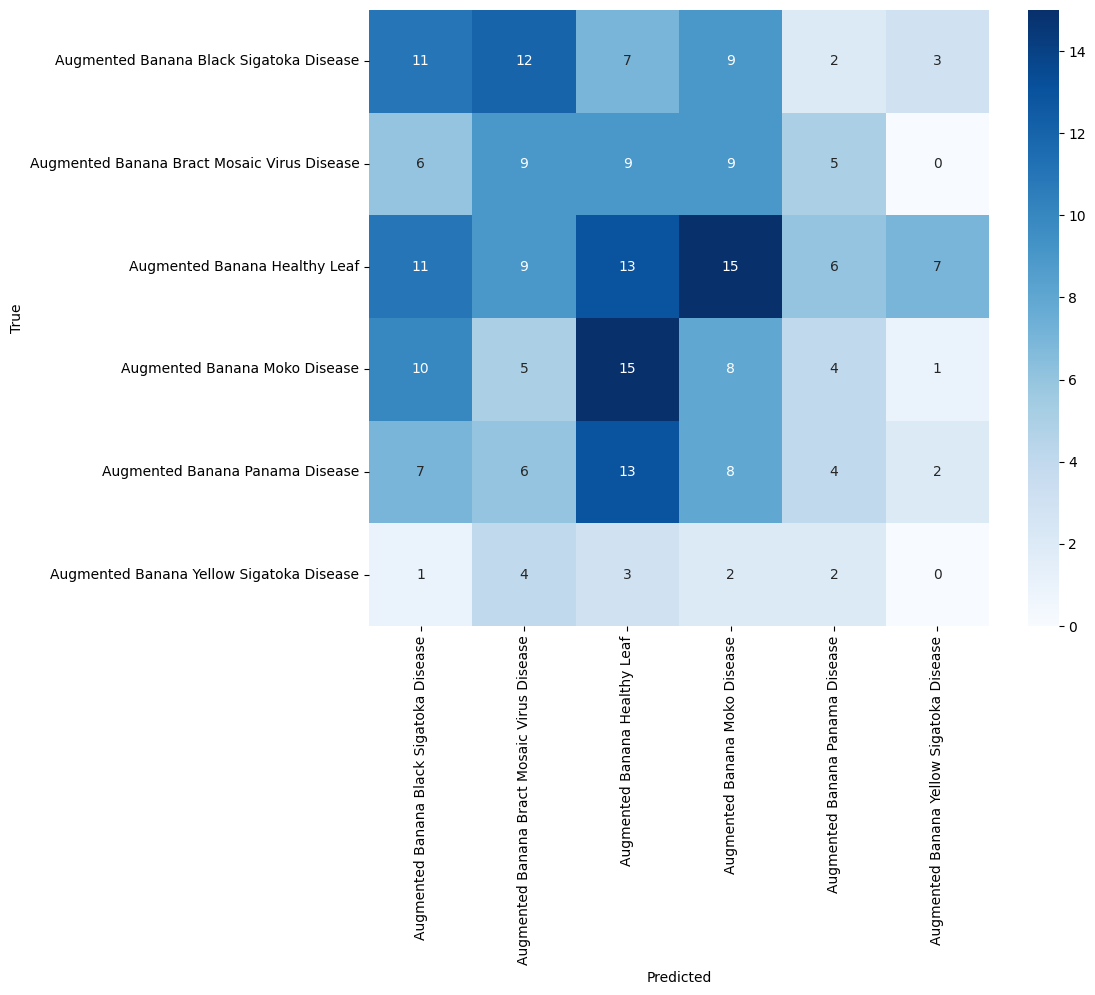

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Generate predictions
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = np.argmax(model.predict(test_data), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(data.class_names)))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.class_names, yticklabels=data.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



In [33]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")



8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - accuracy: 0.8685 - loss: 0.4292
Test Accuracy: 86.13%


In [34]:
import numpy as np  # type: ignore

def predict_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read the file {image_path}")
        return
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  
    prediction = model.predict(img)
    predicted_class = data.class_names[np.argmax(prediction)]
    print(f"Predicted Class: {predicted_class}")


predict_image("test_images/panama.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Predicted Class: Augmented Banana Panama Disease
